##Importing libraries

In [30]:
import numpy as np 
import pandas as pd 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Reading our data from csv files

In [31]:
vaccine_train_set = pd.read_csv('/content/sample_data/vaccine_train_set.csv')

#                               ADD HEAR YOUR TEST SET
#                                         |
#                                         | 
#                                         |
#                                        \/
vaccine_test_set = pd.read_csv('/content/sample_data/vaccine_validation_set.csv') 

vaccine_test_set['tweet'] 

0       @user They had a massive surge in with covid d...
1       Required vaccines for school: Parents and guar...
2       “@KCStar: Two more Johnson County children hav...
3       NV can do better. Which states are the best (a...
4       Nothing like killing ourselves w/ our own fear...
                              ...                        
2277    RT @abc7: Number of measles cases reported in ...
2278    Evidence points to the idea that "measles affe...
2279    Where's @SavedYouAClick "@voxdotcom: Why you s...
2280    Some of my favorite people have autism. If tha...
2281    Coronavirus: The married couple behind the suc...
Name: tweet, Length: 2282, dtype: object

#Cleaning our data:
###1) Lowercase
###2) Delete null 
###3) Removing punctuation
###4) Removing stopwords
###5) Lemmatizing 



In [32]:
stop = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()

def clean_column_text(column):
  column = column.dropna()
  column = column.apply(lambda x: ' '.join([word for word in x.split() if word not in string.punctuation]))
  
  column = column.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

  column = [simple_preprocess(tweet, deacc=False) for tweet in column]

  lem =[]
  for x in column:
    token_lemma = [lemmatizer.lemmatize(token) for token in x ]
    lem.append(token_lemma)
  return lem

In [33]:
clean_column = clean_column_text(vaccine_test_set['tweet'] )
vaccine_test_set['tweet'] = clean_column

clean_column = clean_column_text(vaccine_train_set['tweet'] )
vaccine_train_set['tweet'] = clean_column

vaccine_test_set 

,Unnamed: 0,tweet,label
0,0,"[user, they, massive, surge, covid, death, imm...",1
1,1,"[required, vaccine, school, parent, guardian, ...",0
2,2,"[kcstar, two, johnson, county, child, measles,...",0
3,3,"[nv, better, which, state, best, and, worst, v...",2
4,4,"[nothing, like, killing, fear, mt, alyssa_mila...",2
...,...,...,...
2277,2277,"[rt, abc, number, measles, case, reported, cal...",0
2278,2278,"[evidence, point, idea, measles, affect, immun...",0
2279,2279,"[where, savedyouaclick, voxdotcom, why, vaccin...",2
2280,2280,"[some, favorite, people, autism, if, that, rea...",2


In [28]:
vaccine_train_set

,Unnamed: 0,tweet,label
0,0,"[sip, shop, come, thru, right, marjais, popula...",0
1,1,"[know, my, family, take, covid, vaccine, anyti...",1
2,2,"[msignorile, immunization, mandatory, period, ...",2
3,3,"[president, obama, spoke, favor, vaccination, ...",0
4,4,"[myfoxla, arizona, monitoring, hundred, measle...",0
...,...,...,...
15971,15971,"[salon, believe, anti, vax, nutcase, caused, m...",1
15972,15972,"[how, feel, parent, vaccinate, kid, http, co, ...",0
15973,15973,"[preschooler, tested, measles, simi, valley, h...",0
15974,15974,"[finance, minister, budget, offer, room, procu...",0


#Vectorizing:

In [34]:
#On this point is nesesery to say that is extremely important to Vectorize first the train set and after the test set! 
#This is crusial because the sets need to have the same shape (x_train.shape() == x_test.shape()).

bow_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, min_df=4, max_df=0.6)


x_train = bow_vectorizer.fit_transform(vaccine_train_set['tweet'])
y_train = vaccine_train_set['label'].values


x_test = bow_vectorizer.transform(vaccine_test_set['tweet'])
y_test = vaccine_test_set['label'].values


#Softmax Regression model 

In [35]:
SoftmaxRegressionmodel = LogisticRegression(max_iter=10000,multi_class = 'multinomial', solver = 'lbfgs').fit(x_train, y_train)
y_pred = SoftmaxRegressionmodel.predict(x_test)
print('Softmax Regression\'s accuracy:', accuracy_score(y_pred, y_test)*100, '%')
print('Softmax Regression\'s F1 score:', f1_score(y_pred, y_test, average='micro')*100, '%')

print("Softmax Regression\'s Precision Score : ",precision_score(y_test, y_pred,average='micro')*100, '%')
print("Softmax Regression\'s Recall Score : ",recall_score(y_test, y_pred,  average='micro')*100, '%\n')

Softmax Regression's accuracy: 71.7353198948291 %
Softmax Regression's F1 score: 71.7353198948291 %
Softmax Regression's Precision Score :  71.7353198948291 %
Softmax Regression's Recall Score :  71.7353198948291 %



#Learning Curves🔀

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9919031241043279, 0.9871294565456794, 0.951643383953178, 0.922885633468989, 0.8617173315961044, 0.7935868326963682, 0.6826461382226083, 0.5795996615413559]


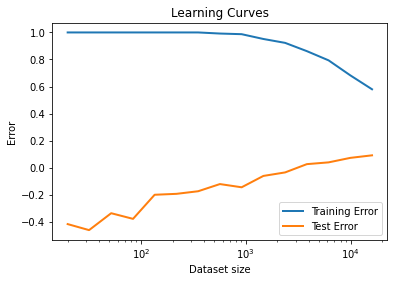

In [39]:
from matplotlib import pyplot as plt
from sklearn import metrics
#import numpy as np
from sklearn.metrics import explained_variance_score

def data_size_response(trX,teX,trY,teY,score_func):
    prob=True
    n_subsets=15
    train_errs,test_errs = [],[]
    subset_sizes = np.exp(np.linspace(3,np.log(trX.shape[0]),n_subsets)).astype(int)

    for m in subset_sizes:
        model =LogisticRegression(max_iter=10000,multi_class = 'multinomial', solver = 'lbfgs').fit(trX[:m],trY[:m])
        train_err = score_func(trY[:m],model.predict(trX[:m]))
        test_err = score_func(teY,model.predict(teX))
        train_errs.append(train_err)
        test_errs.append(test_err)
    print(train_errs)
    return subset_sizes,train_errs,test_errs

def plot_response(subset_sizes,train_errs,test_errs):

    plt.plot(subset_sizes,train_errs,lw=2)
    plt.plot(subset_sizes,test_errs,lw=2)
    plt.legend(['Training Error','Test Error'])
    plt.xscale('log')
    plt.xlabel('Dataset size')
    plt.ylabel('Error')
    plt.title('Learning Curves')
    plt.show()

score_func = explained_variance_score
response = data_size_response(x_train,x_test,y_train,y_test,score_func)
plot_response(*response)